---
## Note from the Teachers:
We added a header with information about your project. 
This is useful since we want to keep a database of all the cool projects participants have made during the courses.
We will save the code in our database and host on github a page to show all the projects. Therefore it is more practical to add some information in the header of each notebook.
Thanks a lot for the understanding and for taking care of it.

You can delete this cell if you want

---

# Project Name (replace with your project name)

> Indented block


Project description (replace with your project description, you can use the same from the `INFO.md` file.

### Project Repo 
link (replace if you have your own repo, otherwise delete)

## Participants:
Please list here all the participants alongside with any information you may want to be visible. This will be hosted on a opencampus.sh repository, so if you want to keep a connection to your github user include this information here. 

### Course and Semester
Add here in which course and in which semester it was done.

### License
If you are releasing the software under some certain license, you can mention it and also include the `LICENSE.md` file in the folder

---

### Colab Setup

In [1]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/drive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
  !pwd

  !pip install -r requirements.txt
  !sudo apt-get install nano
  !cp -f ./resources/cws.py /usr/local/lib/python3.8/dist-packages/scaleogram
  !sudo apt-get autoremove


  from IPython.display import JSON
  from google.colab import output
  from subprocess import getoutput
  import os
  
  #@title jQuery Terminal's [Features](https://terminal.jcubic.pl/)

  def shell(command):
    if command.startswith('cd'):
      path = command.strip().split(maxsplit=1)[1]
      os.chdir(path)
      return JSON([''])
    return JSON([getoutput(command)])
  output.register_callback('shell', shell)


 

  

We're running Colab
Colab: mounting Google drive on  /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Colab: making sure  /content/drive/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22  exists.

Colab: Changing directory to  /content/drive/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22
/content/drive/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22
/content/drive/My Drive/Colab Notebooks/Bakery_Sales_Project_WS22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
nano is already the newest version (2.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


#@title Colab Shell
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
$('#term_demo').terminal(async function(command) {
    if (command !== '') {
        try {
            let res = await google.colab.kernel.invokeFunction('shell', [command])
            let out = res.data['application/json'][0]
            this.echo(new String(out))
        } catch(e) {
            this.error(new String(e));
        }
    } else {
        this.echo('');
    }
}, {
    greetings: 'Welcome to Colab Shell',
    name: 'colab_demo',
    height: 250,
    prompt: 'colab > '
});

\$cd /usr/local/lib/python3.8/dist-packages/scaleogram
$nano cws.py

Correcting this error is easy, we can access to the cws.py in the package, and find this dictionary : COI_DEFAULTS = { 'alpha': '0.5', 'hatch':'/', } , then change '0.5' to 0.5, now the problem is resolved

#@title Colab Shell
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
$('#term_demo').terminal(async function(command) {
    if (command !== '') {
        try {
            let res = await google.colab.kernel.invokeFunction('shell', [command])
            let out = res.data['application/json'][0]
            this.echo(new String(out))
        } catch(e) {
            this.error(new String(e));
        }
    } else {
        this.echo('');
    }
}, {
    greetings: 'Welcome to Colab Shell',
    name: 'colab_demo',
    height: 250,
    prompt: 'colab > '
});

This is example code for the bakery data. You DO NOT need to use this.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style("ticks",{'axes.grid' : True})
import scaleogram as scg 
import pywt


In [3]:
if IN_COLAB:
  DATASET_FOLDER = './data/dataset1/'
  DATA_FOLDER = './data/'
else:
  DATASET_FOLDER = './../data/dataset1/'
  DATA_FOLDER = './../data/'

SALES_DATA = 'sales.csv'
WEATHER_DATA = 'wheather.csv'
KIWO_DATA = 'kiwo.csv'

In [4]:
sales_df = pd.read_csv(os.path.join(DATASET_FOLDER, SALES_DATA))
sales_df

Date  Group       Sales
0      2013-07-01      1  148.828353
1      2013-07-02      1  159.793757
2      2013-07-03      1  111.885594
3      2013-07-04      1  168.864941
4      2013-07-05      1  171.280754
...           ...    ...         ...
10864  2018-12-22      6   66.737353
10865  2018-12-23      6   49.958196
10866  2018-12-24      6   46.130749
10867  2018-12-27      6   51.623140
10868  2018-12-28      6   35.220810

[10869 rows x 3 columns]

In [5]:
weather_df = pd.read_csv(os.path.join(DATASET_FOLDER, WEATHER_DATA))
weather_df

Date  Cloudiness  Temperature  Wind Speed  Weather Code
0     2012-01-01         8.0       9.8250          14          58.0
1     2012-01-02         7.0       7.4375          12           NaN
2     2012-01-03         8.0       5.5375          18          63.0
3     2012-01-04         4.0       5.6875          19          80.0
4     2012-01-05         6.0       5.3000          23          80.0
...          ...         ...          ...         ...           ...
2596  2019-07-28         3.0      23.3500          14           5.0
2597  2019-07-29         6.0      25.2500           7          61.0
2598  2019-07-30         7.0      20.7375           8          61.0
2599  2019-07-31         6.0      20.4500           7          61.0
2600  2019-08-01         5.0      21.0625           9          61.0

[2601 rows x 5 columns]

In [6]:
kiwo_df = pd.read_csv(os.path.join(DATASET_FOLDER, KIWO_DATA))
kiwo_df

Date  KielerWoche
0   2012-06-16            1
1   2012-06-17            1
2   2012-06-18            1
3   2012-06-19            1
4   2012-06-20            1
..         ...          ...
67  2019-06-26            1
68  2019-06-27            1
69  2019-06-28            1
70  2019-06-29            1
71  2019-06-30            1

[72 rows x 2 columns]

In [7]:
# check the values for a specific group
for group in range(0,6):
    print(f"we have {len(sales_df[sales_df['Group'] == (group+1)])} days for group {group+1}")

we have 2115 days for group 1
we have 2115 days for group 2
we have 2115 days for group 3
we have 2061 days for group 4
we have 2115 days for group 5
we have 348 days for group 6


In [8]:
# Create a standard time frame using earliest date and most recent date
datetime = pd.date_range('2013-07-01', periods=2161, freq='D')
datetime

DatetimeIndex(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-04',
               '2013-07-05', '2013-07-06', '2013-07-07', '2013-07-08',
               '2013-07-09', '2013-07-10',
               ...
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', length=2161, freq='D')

In [9]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
G1s = sales_df[sales_df['Group'] == (1)]
G1s = G1s.set_index(pd.to_datetime(G1s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G2s = sales_df[sales_df['Group'] == (2)]
G2s = G2s.set_index(pd.to_datetime(G2s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G3s = sales_df[sales_df['Group'] == (3)]
G3s = G3s.set_index(pd.to_datetime(G3s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G4s = sales_df[sales_df['Group'] == (4)]
G4s = G4s.set_index(pd.to_datetime(G4s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G5s = sales_df[sales_df['Group'] == (5)]
G5s = G5s.set_index(pd.to_datetime(G5s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

G6s = sales_df[sales_df['Group'] == (6)]
G6s = G6s.set_index(pd.to_datetime(G6s['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)

In [10]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
kiwo_df = kiwo_df.set_index(pd.to_datetime(kiwo_df['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)
kiwo_df

KielerWoche
2013-07-01          NaN
2013-07-02          NaN
2013-07-03          NaN
2013-07-04          NaN
2013-07-05          NaN
...                 ...
2019-05-27          NaN
2019-05-28          NaN
2019-05-29          NaN
2019-05-30          NaN
2019-05-31          NaN

[2161 rows x 1 columns]

In [11]:
# reindex weather dataframe to has equal time length as entire data - Missing values will be filled with NAN
weather_df = weather_df.set_index(pd.to_datetime(weather_df['Date'])).drop(['Date'], axis=1).asfreq(freq='D').reindex(datetime)
weather_df

Cloudiness  Temperature  Wind Speed  Weather Code
2013-07-01         6.0      17.8375        15.0          20.0
2013-07-02         3.0      17.3125        10.0           NaN
2013-07-03         7.0      21.0750         6.0          61.0
2013-07-04         7.0      18.8500         7.0          20.0
2013-07-05         5.0      19.9750        12.0           NaN
...                ...          ...         ...           ...
2019-05-27         6.0      15.2625        13.0           NaN
2019-05-28         6.0      13.1625        12.0           NaN
2019-05-29         3.0      13.3625         8.0           0.0
2019-05-30         7.0      14.0125         9.0          61.0
2019-05-31         7.0      18.8500        14.0           NaN

[2161 rows x 4 columns]

In [12]:
import holidays
# get holiday list for Germany SH
ger_sh_holidays = holidays.CountryHoliday('DE',prov='SH')

In [13]:
# create a standard dataframe to contain all timeseries data
df_standard= pd.DataFrame(datetime, columns=['Date'])
df_standard = df_standard.set_index(df_standard['Date']).drop(['Date'], axis=1).asfreq(freq='D')

df_standard['Day'] = np.nan
df_standard['Month'] = np.nan
df_standard['Year'] = np.nan
df_standard['Weekday'] = np.nan
df_standard['Weekend'] = np.nan
df_standard['Holiday'] = np.nan
df_standard['KielerWoche'] = np.nan

df_standard['G1_Sales'] = np.nan
df_standard['G2_Sales'] = np.nan
df_standard['G3_Sales'] = np.nan
df_standard['G4_Sales'] = np.nan
df_standard['G5_Sales'] = np.nan
df_standard['G6_Sales'] = np.nan

df_standard['Cloudiness'] = np.nan
df_standard['Temperature'] = np.nan
df_standard['Wind Speed'] = np.nan
df_standard['Weather Code'] = np.nan

df_standard['Missing Sales'] = np.nan
df_standard['Missing Others'] = np.nan


# consolidate all data into standard dataframe
for date in datetime:
    df_standard.loc[date]['G1_Sales'] = G1s.loc[date]['Sales']
    df_standard.loc[date]['G2_Sales'] = G2s.loc[date]['Sales']
    df_standard.loc[date]['G3_Sales'] = G3s.loc[date]['Sales']
    df_standard.loc[date]['G4_Sales'] = G4s.loc[date]['Sales']
    df_standard.loc[date]['G5_Sales'] = G5s.loc[date]['Sales']
    df_standard.loc[date]['G6_Sales'] = G6s.loc[date]['Sales']

    df_standard.loc[date]['Cloudiness'] = weather_df.loc[date]['Cloudiness']
    df_standard.loc[date]['Temperature'] = weather_df.loc[date]['Temperature']
    df_standard.loc[date]['Wind Speed'] = weather_df.loc[date]['Wind Speed']
    df_standard.loc[date]['Weather Code'] = weather_df.loc[date]['Weather Code']
    df_standard.loc[date]['KielerWoche'] = kiwo_df.loc[date]['KielerWoche']
    
    df_standard.loc[date]['Day'] = date.day
    df_standard.loc[date]['Month'] = date.month
    df_standard.loc[date]['Year'] = date.year

    df_standard.loc[date]['Weekday'] = date.weekday()
    df_standard.loc[date]['Weekend'] = 1 if date.weekday()>4 else 0
    df_standard.loc[date]['Holiday'] = 1 if date in ger_sh_holidays else 0

    df_standard.loc[date]['Missing Sales'] = 1 if df_standard.loc[date][['G1_Sales','G2_Sales','G3_Sales','G4_Sales','G5_Sales','G6_Sales']].isnull().any() else 0
    df_standard.loc[date]['Missing Others'] = 1 if df_standard.loc[date][~df_standard.columns.isin(['G1_Sales','G2_Sales','G3_Sales','G4_Sales','G5_Sales','G6_Sales','Missing Sales','Missing Others'])].isnull().any() else 0

    df_standard = df_standard.fillna(0)
    
df_standard.head(20)

Day  Month    Year  Weekday  Weekend  Holiday  KielerWoche  \
Date                                                                      
2013-07-01   1.0    7.0  2013.0      0.0      0.0      0.0          0.0   
2013-07-02   2.0    7.0  2013.0      1.0      0.0      0.0          0.0   
2013-07-03   3.0    7.0  2013.0      2.0      0.0      0.0          0.0   
2013-07-04   4.0    7.0  2013.0      3.0      0.0      0.0          0.0   
2013-07-05   5.0    7.0  2013.0      4.0      0.0      0.0          0.0   
2013-07-06   6.0    7.0  2013.0      5.0      1.0      0.0          0.0   
2013-07-07   7.0    7.0  2013.0      6.0      1.0      0.0          0.0   
2013-07-08   8.0    7.0  2013.0      0.0      0.0      0.0          0.0   
2013-07-09   9.0    7.0  2013.0      1.0      0.0      0.0          0.0   
2013-07-10  10.0    7.0  2013.0      2.0      0.0      0.0          0.0   
2013-07-11  11.0    7.0  2013.0      3.0      0.0      0.0          0.0   
2013-07-12  12.0    7.0  2013.0      4.0      0.0      0.0          0.0   
2013-07-13  13.0    7.0  2013.0      5.0      1.0      0.0          0.0   
2013-07-14  14.0    7.0  2013.0      6.0      1.0      0.0          0.0   
2013-07-15  15.0    7.0  2013.0      0.0      0.0      0.0          0.0   
2013-07-16  16.0    7.0  2013.0      1.0      0.0      0.0          0.0   
2013-07-17  17.0    7.0  2013.0      2.0      0.0      0.0          0.0   
2013-07-18  18.0    7.0  2013.0      3.0      0.0      0.0          0.0   
2013-07-19  19.0    7.0  2013.0      4.0      0.0      0.0          0.0   
2013-07-20  20.0    7.0  2013.0      5.0      1.0      0.0          0.0   

              G1_Sales    G2_Sales    G3_Sales    G4_Sales    G5_Sales  \
Date                                                                     
2013-07-01  148.828353  535.856285  201.198426   65.890169  317.475875   
2013-07-02  159.793757  546.780787  265.261254   74.543917  383.628682   
2013-07-03  111.885594  427.343259  210.260241   69.262728  305.523072   
2013-07-04  168.864941  454.859641  190.686641   61.490175  308.408168   
2013-07-05  171.280754  492.818804  181.644870   86.759861  355.518770   
2013-07-06  174.552360  631.906068  291.557960   80.646577  361.866933   
2013-07-07   92.637755  695.255730  279.665939   94.603902  370.209601   
2013-07-08  135.500244  538.529250  195.158794   49.500024  285.233382   
2013-07-09  136.048383  585.957265  245.808339   75.208998  342.089346   
2013-07-10  135.132314  567.365765  265.109143   73.805651  343.353067   
2013-07-11  138.549393  569.109375  234.658079   68.633028  315.911757   
2013-07-12  101.447511  600.267915  290.199098    0.000000  362.802490   
2013-07-13  141.233310  747.140776  340.046633   74.274474  359.166189   
2013-07-14  112.524366  777.048842  320.626816  115.271617  461.082125   
2013-07-15  161.264677  596.995100  243.526401   99.493531  380.683697   
2013-07-16  116.821358  558.797138  287.415465   91.779698  320.435336   
2013-07-17  150.572920  628.325719  301.777438    0.000000  396.994247   
2013-07-18  101.900721  647.822254  250.426587   89.205840  300.398790   
2013-07-19  161.635115  646.788960  287.188286   62.063610  369.400389   
2013-07-20  134.328077  843.051280  394.765675   69.936997  346.154004   

            G6_Sales  Cloudiness  Temperature  Wind Speed  Weather Code  \
Date                                                                      
2013-07-01       0.0         6.0      17.8375        15.0          20.0   
2013-07-02       0.0         3.0      17.3125        10.0           0.0   
2013-07-03       0.0         7.0      21.0750         6.0          61.0   
2013-07-04       0.0         7.0      18.8500         7.0          20.0   
2013-07-05       0.0         5.0      19.9750        12.0           0.0   
2013-07-06       0.0         0.0      18.9625         8.0           0.0   
2013-07-07       0.0         0.0      21.3750         9.0           0.0   
2013-07-08       0.0         0.0      22.7250        10.0 

In [14]:
df_standard.describe().transpose()

count         mean         std       min          25%  \
Day             2161.0    15.729755    8.802782     1.000     8.000000   
Month           2161.0     6.531236    3.472521     1.000     3.000000   
Year            2161.0  2015.954188    1.756004  2013.000  2014.000000   
Weekday         2161.0     2.997686    1.999883     0.000     1.000000   
Weekend         2161.0     0.285053    0.451544     0.000     0.000000   
Holiday         2161.0     0.025451    0.157527     0.000     0.000000   
KielerWoche     2161.0     0.020824    0.142827     0.000     0.000000   
G1_Sales        2161.0   121.609685   44.238232     0.000    96.074649   
G2_Sales        2161.0   390.338363  147.255653     0.000   281.658152   
G3_Sales        2161.0   160.825879   78.134143     0.000   104.946089   
G4_Sales        2161.0    83.507887   38.186990     0.000    64.441067   
G5_Sales        2161.0   272.267911  105.985502     0.000   228.600351   
G6_Sales        2161.0    10.821912   27.823203     0.000     0.000000   
Cloudiness      2161.0     4.664044    2.685187     0.000     2.000000   
Temperature     2161.0    11.825403    7.190157    -8.475     6.125000   
Wind Speed      2161.0    10.978714    4.241387     0.000     8.000000   
Weather Code    2161.0    27.353540   28.144402     0.000     0.000000   
Missing Sales   2161.0     0.846367    0.360680     0.000     1.000000   
Missing Others  2161.0     0.984729    0.122656     0.000     1.000000   

                        50%          75%          max  
Day               16.000000    23.000000    31.000000  
Month              7.000000    10.000000    12.000000  
Year            2016.000000  2017.000000  2019.000000  
Weekday            3.000000     5.000000     6.000000  
Weekend            0.000000     1.000000     1.000000  
Holiday            0.000000     0.000000     1.000000  
KielerWoche        0.000000     0.000000     1.000000  
G1_Sales         121.022931   146.289692   416.788764  
G2_Sales         363.882395   482.354587  1203.431130  
G3_Sales         142.385020   201.424733   565.941679  
G4_Sales          78.565833    96.534913   430.500089  
G5_Sales         266.290327   308.207385  1879.461831  
G6_Sales           0.000000     0.000000   172.865985  
Cloudiness         6.000000     7.000000     8.000000  
Temperature       11.375000    17.650000    32.671428  
Wind Speed        10.000000    13.000000    35.000000  
Weather Code      20.000000    61.000000    95.000000  
Missing Sales      1.000000     1.000000     1.000000  
Missing Others     1.000000     1.000000     1.000000

In [15]:
input_names = ['Day', 'Month', 'Year', 'Weekday', 'Weekend', 'Holiday', 'KielerWoche', 
                    'G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales','G5_Sales', 'G6_Sales', 
                    'Cloudiness', 'Temperature', 'Wind Speed', 'Weather Code', 
                    'Missing Sales', 'Missing Others']
                    
target_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales']

In [16]:
#save standard dataframe as seperate combined dataset
df_standard.to_csv(os.path.join(DATASET_FOLDER, 'combined_dataset.csv'))

In [17]:
# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

# Try these ones to see various compromises between scales and time resolution 
#scg.set_default_wavelet('cgau5')
#scg.set_default_wavelet('cgau1')
#scg.set_default_wavelet('shan0.5-2')
#scg.set_default_wavelet('mexh')

df = pd.read_csv(os.path.join(DATASET_FOLDER, 'combined_dataset.csv'))
# df.set_index(pd.to_datetime(df['Date'])).drop(['Date'], axis=1).asfreq(freq='D')
df.set_index(pd.to_datetime(df['Date'])).asfreq(freq='D')

# conversion of dates
datetime = pd.to_datetime(df['Date'])
df.insert(0, 'datetime', datetime)

datetime_lim = [ df.datetime.min(), df.datetime.max() ] 
years_lim = [ df.datetime.min().year, df.datetime.max().year ]

def set_x_yearly(ax, days, start_year=2013):
    xlim  = (np.round([0, days]) / 365).astype(np.int32)
    ticks = np.arange(xlim[0], xlim[1])
    ax.set_xticks(ticks*365)
    ax.set_xticklabels(start_year + ticks)


G1_sales = df[['datetime', 'G1_Sales']].groupby('datetime').sum().squeeze()
G2_sales = df[['datetime', 'G2_Sales']].groupby('datetime').sum().squeeze()
G3_sales = df[['datetime', 'G3_Sales']].groupby('datetime').sum().squeeze()
G4_sales = df[['datetime', 'G4_Sales']].groupby('datetime').sum().squeeze()
G5_sales = df[['datetime', 'G5_Sales']].groupby('datetime').sum().squeeze()
G6_sales = df[['datetime', 'G6_Sales']].groupby('datetime').sum().squeeze()

Cloudiness = df[['datetime', 'Cloudiness']].groupby('datetime').sum().squeeze()
Temperature = df[['datetime', 'Temperature']].groupby('datetime').sum().squeeze()
Wind_Speed = df[['datetime', 'Wind Speed']].groupby('datetime').sum().squeeze()
Weather_Code = df[['datetime', 'Weather Code']].groupby('datetime').sum().squeeze()
KielerWoche = df[['datetime', 'KielerWoche']].groupby('datetime').sum().squeeze()


$cd /usr/local/lib/python3.8/dist-packages/scaleogram
$nano cws.py

Correcting this error is easy, we can access to the cws.py in the package, and find this dictionary : COI_DEFAULTS = { 'alpha': '0.5', 'hatch':'/', } , then change '0.5' to 0.5, now the problem is resolved

Number of available days: 2161


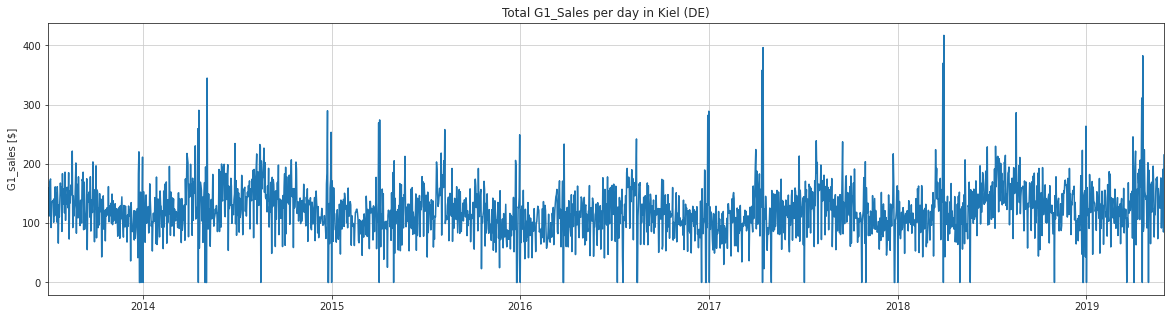

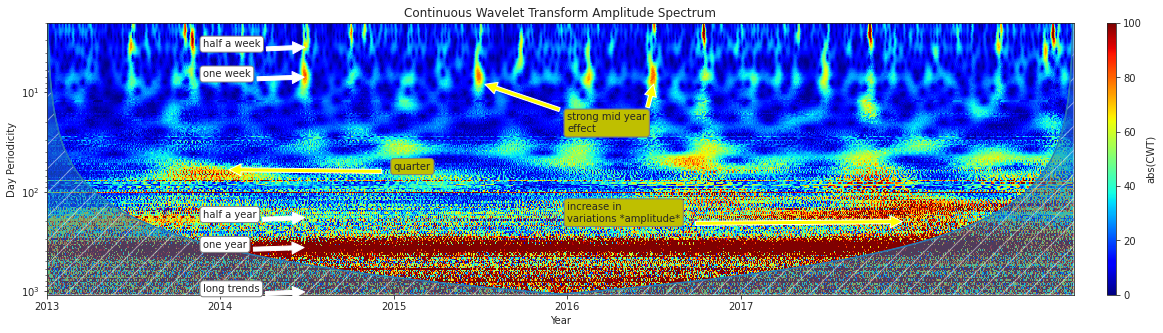

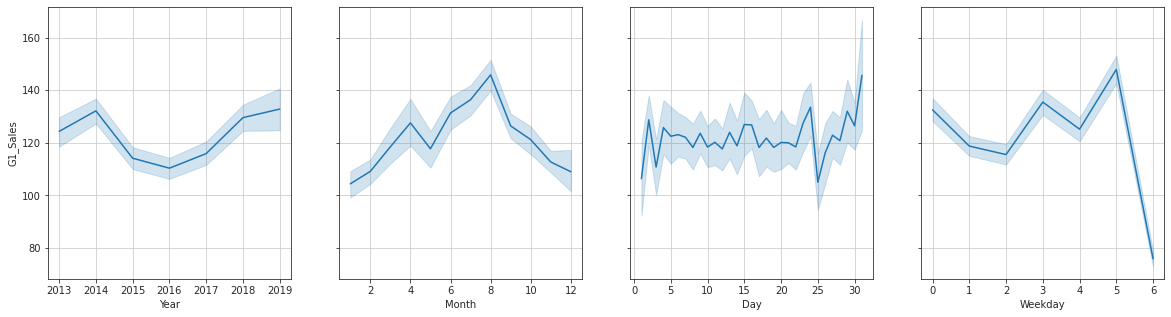

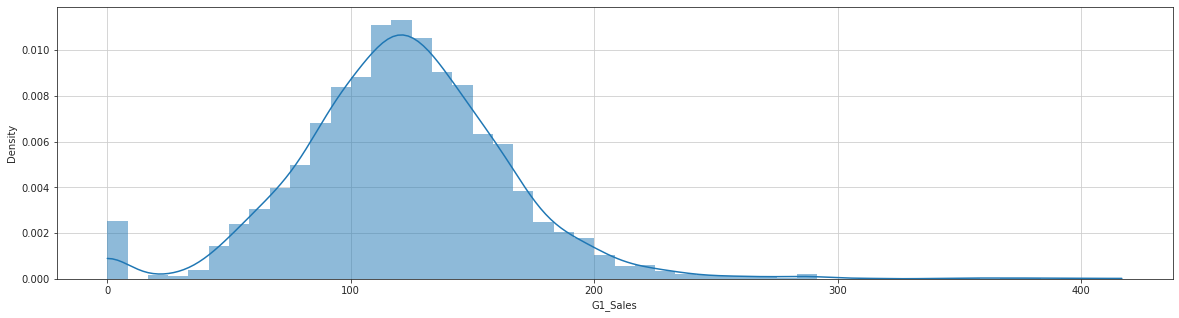

In [18]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G1_sales.index, G1_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G1_sales [$]"); plt.title("Total G1_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 200))

G1_sales_normed = G1_sales-G1_sales.mean()
ax = scg.cws(G1_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,100), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G1_sales_normed))
print("Number of available days:", len(G1_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['G1_Sales'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['G1_Sales'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['G1_Sales'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['G1_Sales'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['G1_Sales'], bins=50, kde=True, stat="density", linewidth=0, edgecolor='black')

Observations

    G1_sales per day : The G1_sales data shows no continuous periodic features as expected at the year scales and smaller ones
    The CWT reveals a lot of information in a short amount of time:
          

Number of available days: 2161


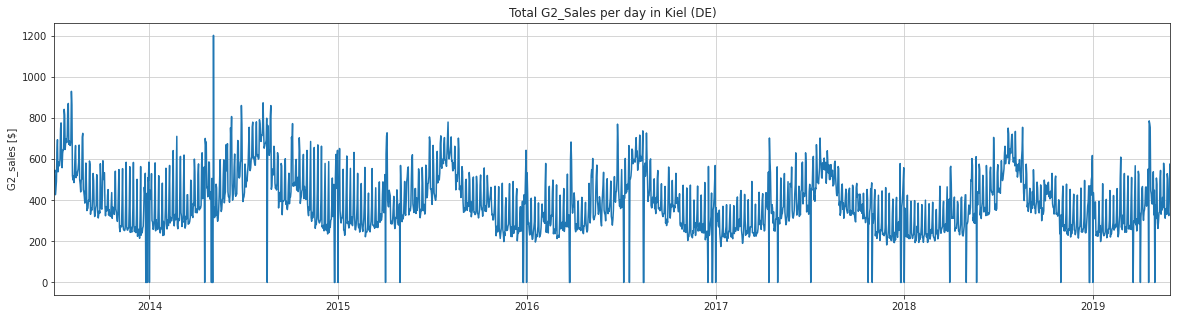

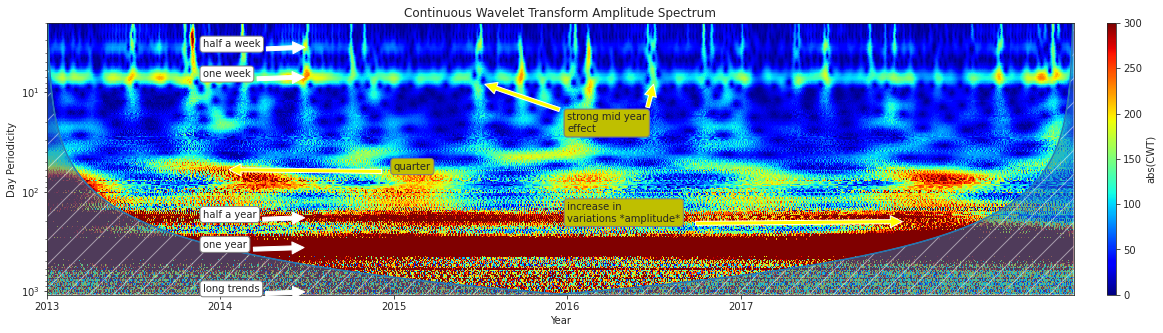

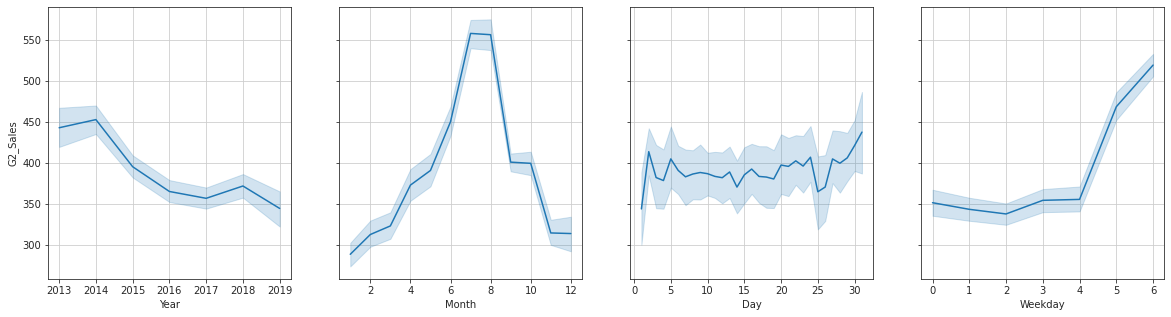

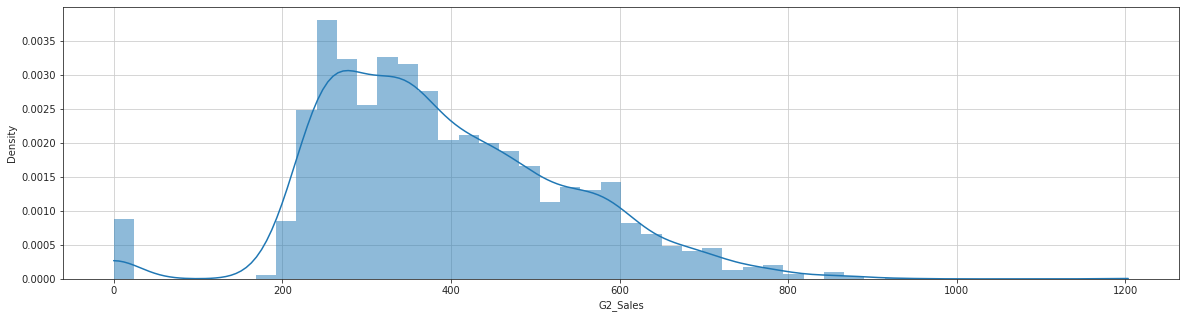

In [19]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G2_sales.index, G2_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G2_sales [$]"); plt.title("Total G2_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 200))

G2_sales_normed = G2_sales-G2_sales.mean()
ax = scg.cws(G2_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,300), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G2_sales_normed))
print("Number of available days:", len(G2_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['G2_Sales'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['G2_Sales'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['G2_Sales'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['G2_Sales'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['G2_Sales'], bins=50, kde=True, stat="density", linewidth=0, edgecolor='black')

Number of available days: 2161


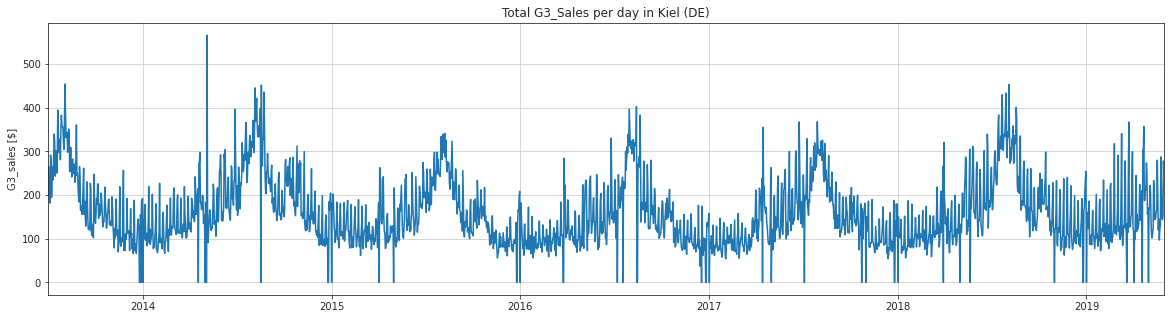

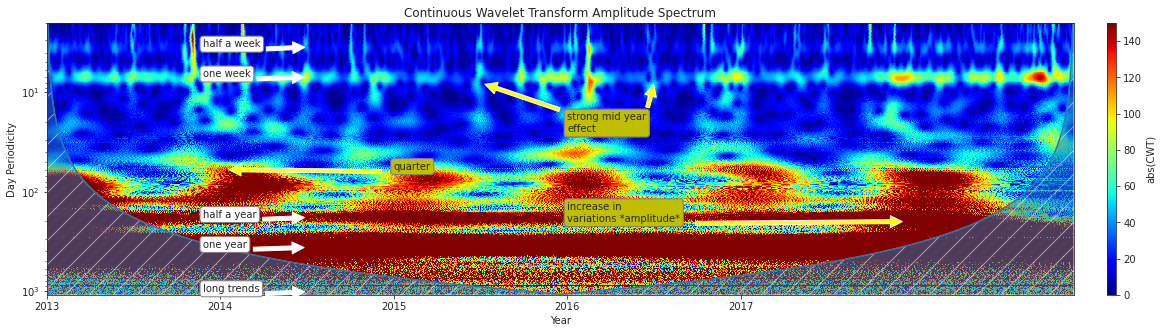

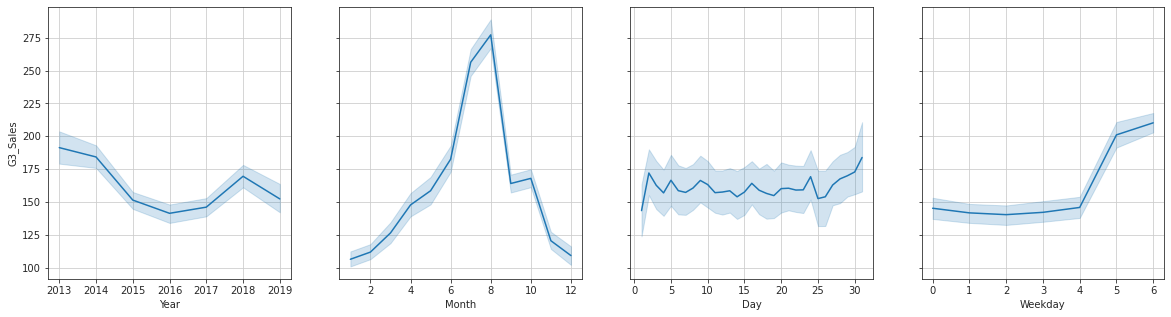

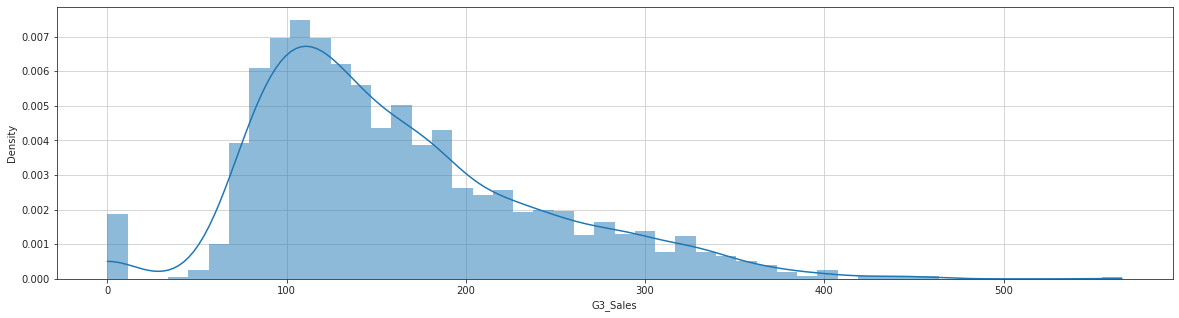

In [20]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G3_sales.index, G3_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G3_sales [$]"); plt.title("Total G3_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G3_sales_normed = G3_sales-G3_sales.mean()
ax = scg.cws(G3_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,150), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G3_sales_normed))
print("Number of available days:", len(G3_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['G3_Sales'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['G3_Sales'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['G3_Sales'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['G3_Sales'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['G3_Sales'], bins=50, kde=True, stat="density", linewidth=0, edgecolor='black')


Number of available days: 2161


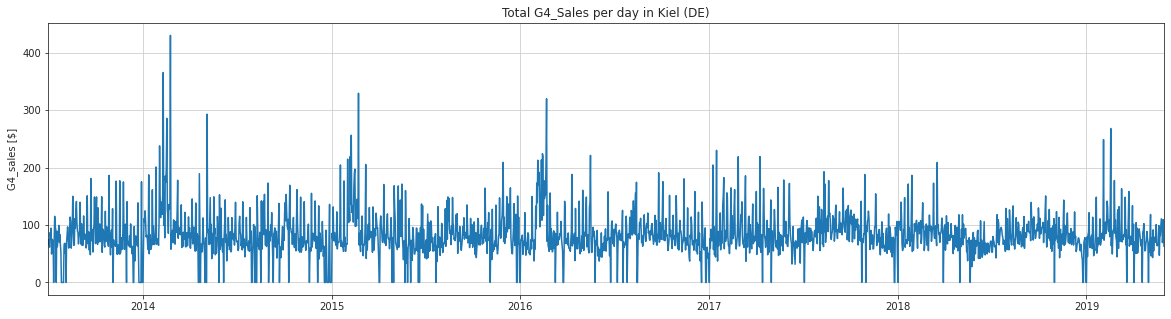

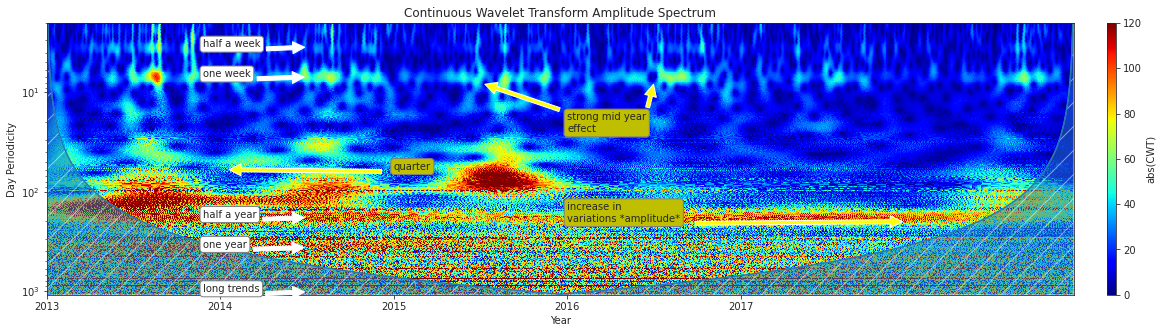

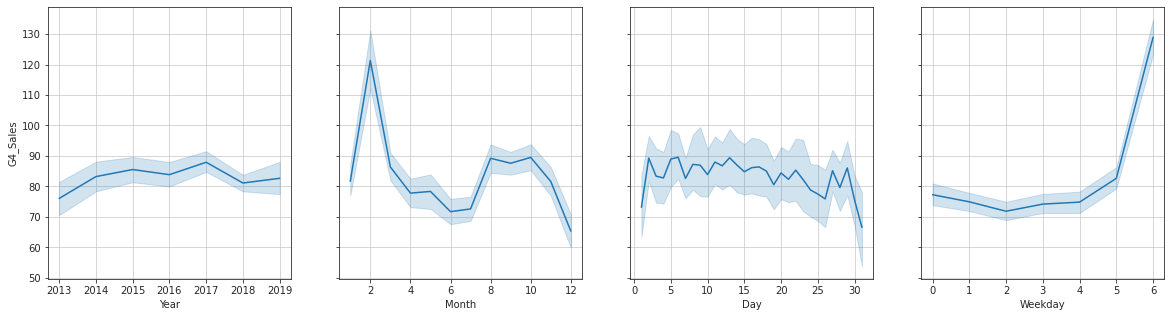

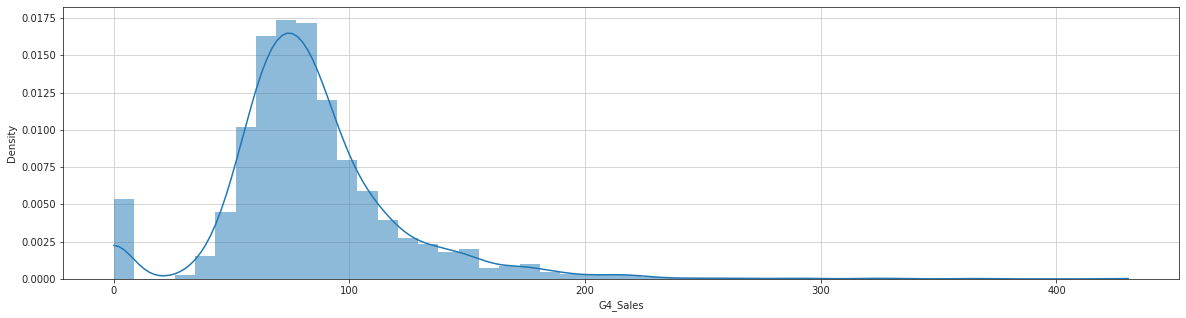

In [21]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G4_sales.index, G4_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G4_sales [$]"); plt.title("Total G4_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G4_sales_normed = G4_sales-G4_sales.mean()
ax = scg.cws(G4_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,120), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G4_sales_normed))
print("Number of available days:", len(G4_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['G4_Sales'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['G4_Sales'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['G4_Sales'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['G4_Sales'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['G4_Sales'], bins=50, kde=True, stat="density", linewidth=0, edgecolor='black')

Number of available days: 2161


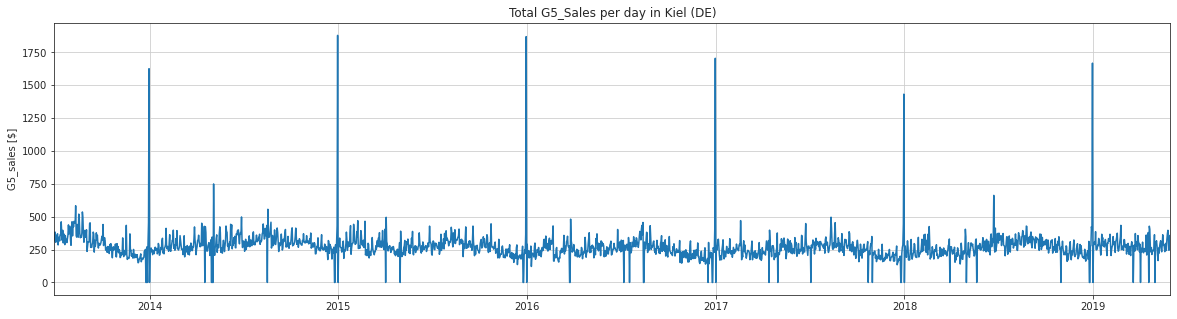

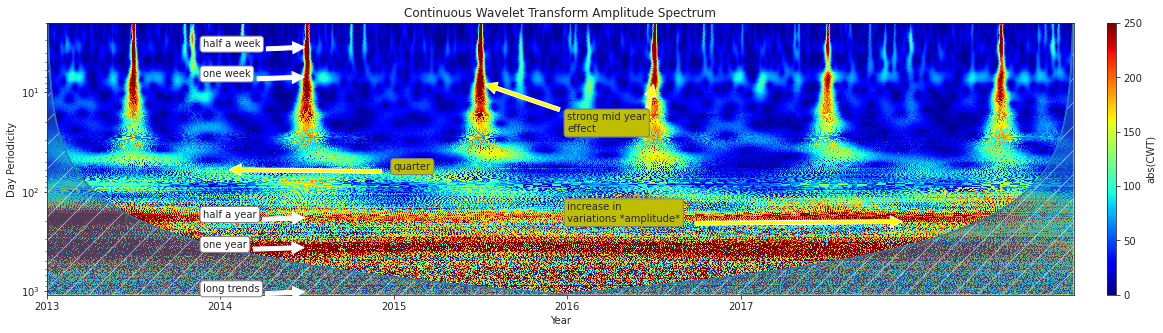

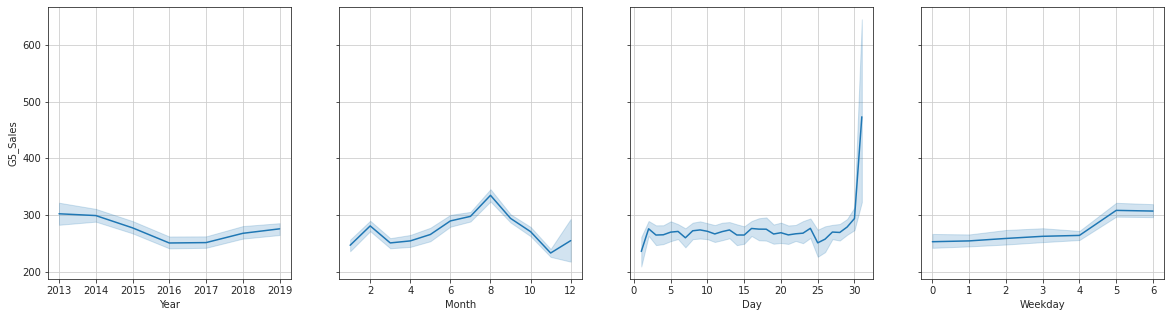

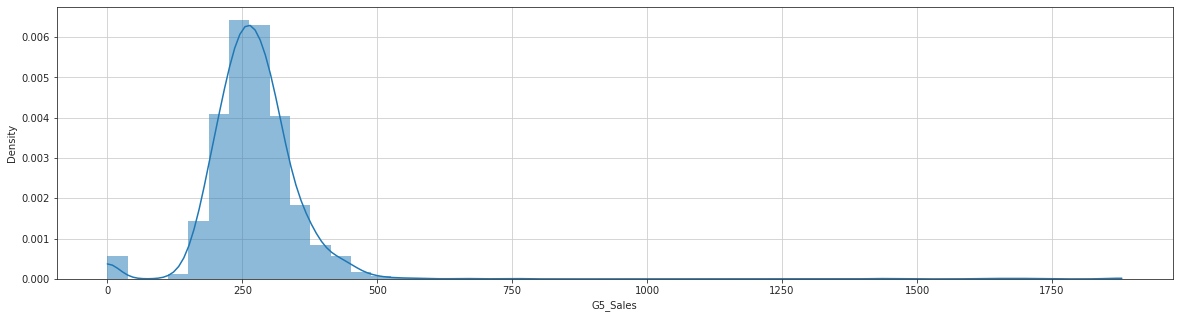

In [22]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G5_sales.index, G5_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G5_sales [$]"); plt.title("Total G5_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G5_sales_normed = G5_sales-G5_sales.mean()
ax = scg.cws(G5_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,250), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G5_sales_normed))
print("Number of available days:", len(G5_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['G5_Sales'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['G5_Sales'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['G5_Sales'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['G5_Sales'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['G5_Sales'], bins=50, kde=True, stat="density", linewidth=0, edgecolor='black')

Number of available days: 2161


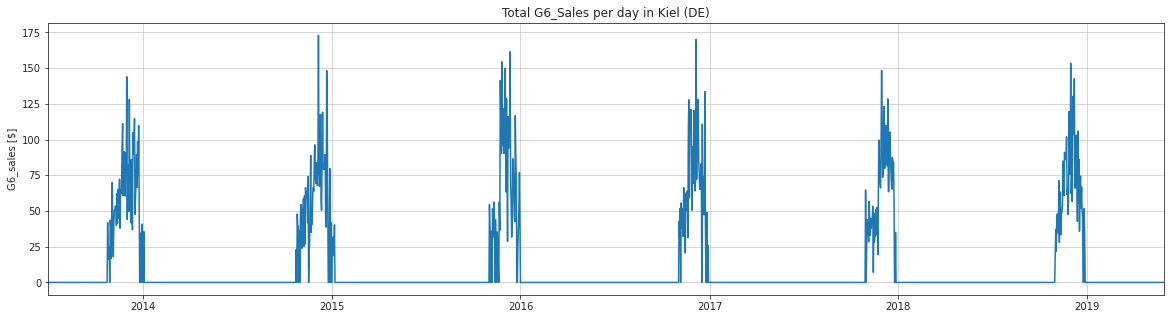

In [ ]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(G6_sales.index, G6_sales.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("G6_sales [$]"); plt.title("Total G6_Sales per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

G6_sales_normed = G6_sales-G6_sales.mean()
ax = scg.cws(G6_sales_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,250), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(G6_sales_normed))
print("Number of available days:", len(G6_sales_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['G6_Sales'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['G6_Sales'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['G6_Sales'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['G6_Sales'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['G6_Sales'], bins=50, kde=True, stat="density", linewidth=0, edgecolor='black')

In [ ]:
Cloudiness = df[['datetime', 'Cloudiness']].groupby('datetime').sum().squeeze()
Temperature = df[['datetime', 'Temperature']].groupby('datetime').sum().squeeze()
Wind_Speed = df[['datetime', 'Wind Speed']].groupby('datetime').sum().squeeze()
Weather_Code = df[['datetime', 'Weather Code']].groupby('datetime').sum().squeeze()
KielerWoche = df[['datetime', 'KielerWoche']].groupby('datetime').sum().squeeze()

In [ ]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(Cloudiness.index, Cloudiness.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("Cloudiness [unit]"); plt.title("Cloudiness measurements per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

Cloudiness_normed = Cloudiness-Cloudiness.mean()
ax = scg.cws(Cloudiness_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,10), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(Cloudiness_normed))
print("Number of available days:", len(Cloudiness_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 
text = ax.annotate("increase in\nvariations *amplitude*", xy=(365*5, 200), xytext=(365*3, 200), 
                   bbox=bbox2, arrowprops=arrowprops2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['Cloudiness'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['Cloudiness'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['Cloudiness'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['Cloudiness'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['Cloudiness'], bins=100, kde=True, stat="density", linewidth=0, edgecolor='black')

In [ ]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(Temperature.index, Temperature.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("Temperature [unit]"); plt.title("Temperature measurements per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(1.5), np.log10(365*3), 500))

Temperature_normed = Temperature-Temperature.mean()
ax = scg.cws(Temperature_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,17), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(Temperature_normed))
print("Number of available days:", len(Temperature_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 90), xytext=(365*2, 90), 
                   bbox=bbox2, arrowprops=arrowprops2)

               
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['Temperature'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['Temperature'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['Temperature'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['Temperature'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['Temperature'], bins=100, kde=True, stat="density", linewidth=0, edgecolor='black')


In [ ]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(Wind_Speed.index, Wind_Speed.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("Wind Speed [unit]"); plt.title("Wind speed measurements per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

Wind_Speed_normed = Wind_Speed-Wind_Speed.mean()
ax = scg.cws(Wind_Speed_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,10), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(Wind_Speed))
print("Number of available days:", len(Cloudiness_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['Wind Speed'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['Wind Speed'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['Wind Speed'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['Wind Speed'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['Wind Speed'], bins=100, kde=True, stat="density", linewidth=0, edgecolor='black')

In [ ]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(Weather_Code.index, Weather_Code.values, '-')
plt.xlim(datetime_lim)
plt.ylabel("Weather_Code [unit]"); plt.title("Weather_Code measurements per day in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

Weather_Code_normed = Weather_Code-Weather_Code.mean()
ax = scg.cws(Weather_Code_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,80), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(Weather_Code_normed))
print("Number of available days:", len(Weather_Code_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*1.5, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("quarter", xy=(365*1, 60), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

text = ax.annotate("strong mid year\neffect", xy=(365*2.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)
text = ax.annotate("strong mid year\neffect", xy=(365*3.5, 8), xytext=(365*3, 25), 
                   bbox=bbox2, arrowprops=arrowprops2)                 

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['Weather Code'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['Weather Code'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['Weather Code'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['Weather Code'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['Weather Code'], bins=100, kde=True, stat="density", linewidth=0, edgecolor='black')

In [ ]:
fig = plt.figure(figsize=(20, 5))
lines = plt.plot(KielerWoche.index, KielerWoche, '-')
lines = plt.plot(KielerWoche.index, KielerWoche, '-')
plt.xlim(datetime_lim)
plt.ylabel("KielerWoche "); plt.title("KielerWoche activity PER DAY in Kiel (DE)")
xlim = plt.xlim()

# use linear spaced scales values when using linear-Y-axis :-)
scales = scg.periods2scales(np.arange(1, 365+100, 3))
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 300))

KielerWoche_normed = KielerWoche-KielerWoche.mean()
ax = scg.cws(KielerWoche_normed, scales=scales, figsize=(20, 5), xlabel="Year", ylabel="Day Periodicity", 
             clim=(0,.6), yscale='log')  # choose log scale or linear scale
set_x_yearly(ax, len(KielerWoche_normed))
print("Number of available days:", len(KielerWoche_normed))


bbox = dict(boxstyle="round", facecolor="w", edgecolor="0.5")
bbox2 = dict(boxstyle="round", facecolor="y", edgecolor="0.5")
arrowprops = dict(facecolor='white', shrink=0.05)
arrowprops2 = dict(facecolor='yellow', shrink=0.05)
for period, label in [ (3.5, "half a week"), (7, "one week"), (365/2, "half a year"), 
                      (365, "one year"), (365*2.8, "long trends")]:

    text = ax.annotate(label, xy=(365*2, period), xytext=(365*.9, period), 
                       bbox=bbox, arrowprops=arrowprops)

text = ax.annotate("strong month effect", xy=(365*1, 30), xytext=(365*2, 60), 
                   bbox=bbox2, arrowprops=arrowprops2)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.lineplot(ax=axes[0], x=df_standard['Year'], y=df_standard['KielerWoche'])
sns.lineplot(ax=axes[1], x=df_standard['Month'], y=df_standard['KielerWoche'])
sns.lineplot(ax=axes[2], x=df_standard['Day'], y=df_standard['KielerWoche'])
sns.lineplot(ax=axes[3], x=df_standard['Weekday'], y=df_standard['KielerWoche'])

fig = plt.figure(figsize=(20, 5))
sns.histplot(df_standard['KielerWoche'], bins=100, kde=True, stat="density", linewidth=0, edgecolor='black')

### Import Essential Libraries

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from numpy import genfromtxt
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
import pylab as pl
import seaborn as sns
from pathlib import Path
import shutil

### Import essential Tensorflow - Keras libraries

In [ ]:
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model

try:
  from google.colab import drive
  from tensorflow.keras.optimizers.legacy import RMSprop,Adam,SGD,Adadelta,Adagrad,Adamax
except:
  from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adadelta,Adagrad,Adamax

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.keras.utils import plot_model, to_categorical, normalize
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()


In [ ]:
tfa.__version__

### Check for available GPUs and configure Tensorflow session to utilize GPU

In [ ]:
try:
  # tf.debugging.experimental.enable_dump_debug_info('.', tensor_debug_mode="FULL_HEALTH", circular_buffer_size=-1)
  # tf.debugging.set_log_device_placement(True)
  from tensorflow.python.client import device_lib

  device_name = tf.test.gpu_device_name()
  if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
  print('Found GPU at: {}'.format(device_name))

  config = tf.compat.v1.ConfigProto()
  config.gpu_options.allow_growth = True
  config.gpu_options.per_process_gpu_memory_fraction = 0.1
  sess = tf.compat.v1.InteractiveSession(config=config)
  set_session(sess)
  print(device_lib.list_local_devices())
  gpus = tf.config.experimental.list_physical_devices('GPU')
  for gpu in gpus:
    try:
      tf.config.experimental.set_memory_growth(gpu, True)
      # Restrict TensorFlow to only use the first GPU
      tf.config.set_visible_devices(gpus[0], 'GPU')
      logical_gpus = tf.config.list_logical_devices('GPU')
      print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
      # Visible devices must be set before GPUs have been initialized
      print(e)

except Exception as error:
    print("Error trying to configure computing device.")
    print(error)

### Version Check: Tensorflow - Cuda - CuDNN 

In [ ]:
from tensorflow.python.platform import build_info as tf_build_info
print("Tensorflow verison: ",tf.__version__)
print("CUDA verison: ", tf_build_info.build_info['cuda_version'])
print("CUDNN verison: ", tf_build_info.build_info['cudnn_version'])

### Setup Tensorflow-GPU precision 
Mixed precision is the use of both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory. 

In [ ]:
# tf.keras.backend.floatx()
# tf.keras.backend.set_floatx('float16')
# tf.keras.mixed_precision.experimental.set_policy('mixed_float16')
tf.keras.backend.floatx()

### Import CSV Data with Pandas

In [ ]:
file = os.path.join(DATASET_FOLDER, 'combined_dataset.csv')



myData = pd.read_csv(file, delimiter=',', parse_dates=['Date'])
myData = myData.set_index(pd.to_datetime(myData['Date'])).drop(['Date'], axis=1).asfreq(freq='D')
# myData.set_index(pd.to_datetime(myData['Date'])).asfreq(freq='D')
# myData.round(decimals=6)
# myData=myData.astype(np.float32)
# myData=myData.astype(np.float16)
myData.describe().transpose()


### Check Datatypes

In [ ]:
# myData.convert_dtypes('float16')
myData.dtypes

### Check Shape of DataFrame

In [ ]:
myData.shape

### List of features or signals used in the data-set.

In [ ]:
data_top = myData.columns.values
data_top

### Display top rows of the DataFrame

In [ ]:
myData.head()

### Display bottom rows of the DataFrame

In [ ]:
myData.tail()

### Check for Missing Data 


In [ ]:
# plt.figure(figsize=(30,5*16))
# myData.plot(subplots=True, figsize=(30,5*16))
# plt.grid(color='b', linestyle='-.', linewidth=0.5)
# plt.show()
myData.isnull().values.any()

### Plot a few signals 


In [ ]:
# plt.figure(figsize=(30,10))
myData.plot(subplots=True, figsize=(30,30), sharex=True)
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.show()

### Input - Output Feature Selection

In [ ]:
input_names = ['Day', 'Month', 'Year', 'Weekday', 'Weekend', 'Holiday', 'KielerWoche', 
                    'G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales','G5_Sales', 'G6_Sales', 
                    'Cloudiness', 'Temperature', 'Wind Speed', 'Weather Code', 
                    'Missing Sales', 'Missing Others']

                    
target_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales']

### Attempting to Predict the future Target Features.

#### To achieve this we shift the target features by one timestep backward

In [ ]:
shift_steps = 1

### Create a new DataFrame with the time-shifted data.

#### **Note the negative time-shift!**

In [ ]:
df_targets = myData[target_names].replace(0., 1e-3).shift(-shift_steps)
df_targets

**WARNING!** You should double-check that you have shifted the data in the right direction! We want to predict the future, not the past!

The shifted data-frame is confusing because Pandas keeps the original time-stamps even though we have shifted the data. You can check the time-shift is correct by comparing the original and time-shifted data-frames.

This is the first `shift_steps + 5` rows of the original data-frame:

In [ ]:
myData[target_names].head(shift_steps + 5)

The following is the `first 5 rows` of the time-shifted data-frame. This should be identical to the `last 5 rows` shown above from the original data, except for the time-stamp.

In [ ]:
df_targets.head(5)

The time-shifted data-frame has the same length as the original data-frame, but the last observations are `NaN` (not a number) because the data has been shifted backwards so we are trying to shift data that does not exist in the original data-frame.

In [ ]:
df_targets.tail(5)

### NumPy Arrays

We now convert the Pandas data-frames to NumPy arrays that can be input to the neural network. We also remove the last part of the numpy arrays, because the target-data has `NaN` for the shifted period, and we only want to have valid data and we need the same array-shapes for the input- and output-data.

These are the input-signals:

In [ ]:
x_data = myData[input_names].values[:-shift_steps].astype(np.float32, casting='unsafe')
# x_data = myData[input_names].values
x_data

### Input Data Characteristics

In [ ]:
print("X-data Type:", type(x_data))
print("X-data Dtype:", x_data.dtype)
print("X-data Shape:", x_data.shape)
print("X-data Infinite values:", np.isinf(x_data).any())
print("X-data NaN values:", np.isnan(x_data).any())

These are the output-signals (or target-signals):

In [ ]:
y_data = df_targets.values[:-shift_steps].astype(np.float32, casting='unsafe')
# y_data = df_targets.values
y_data

### Target Data Characteristics

In [ ]:
print("Y-data Type:", type(y_data))
print("Y-data Dtype:", y_data.dtype)
print("Y-data Shape:", y_data.shape)
print("Y-data Infinite values:", np.isinf(y_data).any())
print("Y-data NaN values:", np.isnan(y_data).any())

This is the number of observations (aka. data-points or samples) in the data-set:

In [ ]:
num_data = len(x_data)
num_data

### Define training, validation and testing sample size

In [ ]:
shuffle = False
batch_size = 32
sequence_length = 7
train_split = 0.9
num_train = int(train_split * num_data)
num_val = int(0.5*(num_data - num_train))
num_test = (num_data - num_train) - num_val
steps_per_epoch = int((num_train/batch_size)/40)
train_validation_steps = int((num_val/batch_size))
test_validation_steps = int((num_test/batch_size))
print('num_train:',num_train, 'num_val:',num_val, 'num_test:',num_test)
print('steps_per_epoch:', steps_per_epoch)
print('train_validation_steps:', train_validation_steps, 'test_validation_steps:', test_validation_steps)

In [ ]:
y_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(y_data)
x_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=train_split, random_state=None, shuffle=shuffle)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

### Visualize Time Shifted Targets

In [ ]:
signal_ = 0  # First signal from the 20 input-signals.
seq = y_train[:100, signal_].reshape(-1,1)
seq1 = myData[target_names].values[:100, signal_].reshape(-1,1)
plt.figure(figsize=(30,5))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.plot(np.concatenate((seq, seq1), axis=1))
plt.legend(['Time Shifted Target','Unshifted Target', ])
# np.concatenate((seq,seq1), axis=1)

This is the number of observations in the training-set:

In [ ]:
num_train = len(x_train)
num_train

This is the number of observations in the test-set:

In [ ]:
num_test = len(x_test)
num_test

These is the total number of input observations for the training and test sets:

In [ ]:
len(x_train) + len(x_test)

These is the total number of output observations for the training and test sets:

In [ ]:
len(y_train) + len(y_test)

This is the number of input features:

In [ ]:
num_x_signals = x_data.shape[1]
num_x_signals

This is the number of target features:

In [ ]:
num_y_signals = y_data.shape[1]
num_y_signals

### Check Data Magnitudes

The data-set contains a wide range of values:

In [ ]:
print('x_train min:', x_train.min())
print('x_train max:', x_train.max())

print('y_train min:', y_train.min())
print('y_train max:', y_train.max())

print('x_test min:', x_test.min())
print('x_test max:', x_test.max())

print('y_test min:', y_test.min())
print('y_test max:', y_test.max())


## Check Train and Test Set Distribution


In [ ]:
plt.figure(figsize=(20,5))
sns.histplot([y_train[:,0],y_test[:,0]], bins=40, kde=True, stat="density", linewidth=0, edgecolor='black')
plt.legend(['G1_Sales', 'G1_Sales'])
plt.title('PDF of G1_Sales Train and Test Dataset')
plt.grid()
plt.show()

plt.figure(figsize=(20,5))
sns.histplot([y_train[:,1],y_test[:,1]], bins=40, kde=True, stat="density", linewidth=0, edgecolor='black')
plt.legend(['G2_Sales', 'G2_Sales'])
plt.title('PDF of G2_Sales Train and Test Dataset')
plt.grid()
plt.show()


## Custom Tensorflow Data Generator 

The data-set has now been prepared as 2-dimensional numpy arrays. 

These are the array-shapes of the input and output data:

In [ ]:
class CustomDataGen(tf.keras.utils.Sequence):
        
    def __init__ (self, x_data, y_data, batch_size=None, sequence_length=None, shift_steps=None, train=True, validation=True, random_batch=True, random_idx=False):
        
        self.x_train = x_data[0]
        self.x_test = x_data[1]        
        self.y_train = y_data[0]
        self.y_test = y_data[1]
        self.batch_size = batch_size
        self.sequence_length = sequence_length
        self.shift_steps = shift_steps
        self.train = train
        self.validation = validation
        self.random_batch = random_batch
        self.random_idx = random_idx
        self.n = int(self.x_train.shape[0])
    
    def on_epoch_end(self):
        #do nothing
        return

    def __getitem__(self, index):
        if self.train:
            # print('using train samples')
            x_samples = self.x_train 
            y_samples = self.y_train 
            self.n = x_samples.shape[0]

        elif self.validation:
            # print('using validation samples')
            x_samples = self.x_test[:num_val]
            y_samples = self.y_test[:num_val]
            self.n = x_samples.shape[0]
        else:
            # print('using test samples')
            x_samples = self.x_test[-num_test:]
            y_samples = self.y_test[-num_test:]
            self.n = x_samples.shape[0]

            # Allocate a new array for the batch of input-signals.
        if self.train : #or self.validation
            # sequence_length_ = np.random.randint(1,self.sequence_length)
            sequence_length_ = self.sequence_length

        else:
            sequence_length_ = self.sequence_length
            # print(f"Sequence_length: {sequence_length_}")
        
        if self.random_batch:
            batch_size_ = np.random.randint(1,self.batch_size)
        else: 
            batch_size_ = batch_size
        
 
        x_shape = (batch_size_, self.sequence_length, x_samples.shape[1])
        y_shape = (batch_size_, self.shift_steps, y_samples.shape[1])
        x_batch = np.zeros(shape=x_shape, dtype=np.float32)  
        y_batch = np.zeros(shape=y_shape, dtype=np.float32) 

            
        # Fill the batch with random sequences of data.
        for i in range(batch_size_):
            # Get a random start-index.
            idx = np.random.randint(self.n - sequence_length_)

            if self.random_idx:
                sample_idx = np.random.randint(1,x_samples.shape[-1])
            else:
                sample_idx = x_samples.shape[-1]

            # Inputs
            x_batch[i:, :sequence_length_, :] = x_samples[idx:idx+sequence_length_].reshape(-1,x_samples.shape[-1]) 
            
            # Outputs
            y_batch[i] = y_samples[idx+sequence_length_-self.shift_steps:idx+sequence_length_]  
        
        assert not (np.isnan(x_batch).any() or np.isnan(x_batch).any())

        return x_batch, y_batch 
    
    def __len__(self):
        return int(self.n / self.batch_size)


x_train_generator = CustomDataGen((x_train, x_test), (y_train, y_test), batch_size=batch_size, sequence_length=sequence_length, shift_steps=shift_steps, train=True, validation=False, random_batch=False, random_idx=True)
x_train_batch, y_train_batch=x_train_generator.__getitem__(1)

print('x_train shape: ', x_train_batch.shape, 'x_train dtype:', x_train_batch.dtype)  
print('y_train0 shape: ', y_train_batch.shape, 'y_train dtype:', y_train_batch.dtype)


x_val_generator = CustomDataGen((x_train, x_test), (y_train, y_test), batch_size=batch_size, sequence_length=sequence_length, shift_steps=shift_steps, train=False, validation=True, random_batch=False, random_idx=True)
x_val_batch, y_val_batch=x_val_generator.__getitem__(1)

print('x_val shape: ', x_val_batch.shape, 'x_val dtype:', x_val_batch.dtype)  
print('y_val0 shape: ', y_val_batch.shape, 'y_val dtype:', y_val_batch.dtype)


x_test_generator = CustomDataGen((x_train, x_test), (y_train, y_test), batch_size=batch_size, sequence_length=sequence_length, shift_steps=shift_steps, train=False, validation=False,  random_batch=False, random_idx=True)
x_test_batch, y_test_batch=x_test_generator.__getitem__(1)

print('x_test shape: ', x_test_batch.shape, 'x_test dtype:', x_test_batch.dtype)  
print('y_val0 shape: ', y_val_batch.shape, 'y_val dtype:', y_val_batch.dtype)


batch = 0   # First sequence in the batch.
signal_ = 0  # First signal from the 20 input-signals.
seq = x_train_batch[batch, :, signal_]
plt.figure(figsize=(15,5))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.plot(seq)
plt.legend(['Input Signal'])
seq = y_train_batch[batch, :, signal_]
plt.figure(figsize=(15,5))
plt.grid(color='b', linestyle='-.', linewidth=0.5)
plt.plot(seq)
plt.legend(['Target Signal'])


## Implement Custom Loss Function

In [ ]:
with tf.device('/device:GPU:0'):
    # tf.data.experimental.enable_debug_mode()
    tf.config.run_functions_eagerly(True)
    @tf.function(experimental_relax_shapes=True, reduce_retracing=True)
    class MeanExponentWeightedError(tf.keras.losses.Loss):
        def __init__(self):
            super().__init__()

        @tf.autograph.experimental.do_not_convert   # breakpoint now recognized with this decorator
        def call(self, y_true, y_pred):
            
            y_true = tf.math.multiply_no_nan(y_true,1)
            y_pred = tf.math.multiply_no_nan(y_pred,1)

            # assert not tf.reduce_any(tf.math.is_nan(y_true, name=None))
            # assert not tf.reduce_any(tf.math.is_nan(y_pred, name=None))
            # assert tf.executing_eagerly()
    
            # Calculate the loss for each value in these tensors.    
            mean_squared_error = tf.keras.losses.mean_squared_error(y_true=y_true, y_pred=y_pred)
            root_mean_squared_error = tf.reduce_mean(tf.math.sqrt(mean_squared_error))
            # loss_mae = tf.keras.losses.mean_absolute_error(y_true=y_true, y_pred=y_pred)
            loss_mape = tf.keras.losses.mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)

            # loss_rmape = tf.math.sqrt(loss_mape)
            # loss = tf.math.reduce_sum([loss_mse,loss_rmse,loss_mae,loss_mape,loss_rmape], axis=-1)
            # initialize exponential weighting values 
            powers = tf.range(start=2, limit=1, delta=tf.math.divide(-1,y_pred.shape[-2]), dtype=float, name='range').reshape(1,-1,1)
            # powers = tf.range(start=2, limit=0, delta=tf.math.divide(-2,shift_steps), dtype=float, name='range').reshape(1,-1,1)
            # replicate along batch and features
            powers = tf.repeat(powers,repeats=y_pred.shape[-1], axis=-1)
            # powers = tf.repeat(powers,repeats=num_y_signals, axis=-1)
            powers = tf.repeat(powers,repeats=y_pred.shape[-3], axis=-3)
            # powers = tf.repeat(powers,repeats=batch_size, axis=-3)
            # compute absolute error
            error = tf.math.subtract(y_true, y_pred)
            absolute_error = tf.math.abs(error)
            # compute weighted error
            exp_weighted_error = tf.math.pow(absolute_error, powers)
            # exp_weighted_error = tf.math.pow(absolute_error, 2)
            # compute mean weighted error
            mean_exp_weighted_error = tf.math.reduce_mean(exp_weighted_error, axis=None, keepdims=False, name=None)
            return tf.math.reduce_sum([mean_exp_weighted_error, root_mean_squared_error, tf.reduce_mean(tf.sqrt(loss_mape))], axis=-1)


In [ ]:
def create_DNN_model(N=32):
    inputs = layers.Input(name='Input_Layer', shape=(sequence_length,num_x_signals))
    # Extract Features
    Out1 = TimeDistributed(Dense(name='H1', units=N*shift_steps*13, activation='silu', trainable=True))(inputs)
    norm_Out1 = BatchNormalization(name='BN1_Layer')(Out1)
    Out2 = TimeDistributed(Dense(name='H2', units=N*shift_steps*12, activation='silu', trainable=True))(norm_Out1)
    norm_Out2 = BatchNormalization(name='BN2_Layer')(Out2)
    Out3 = TimeDistributed(Dense(name='H3', units=N*shift_steps*11, activation='silu', trainable=True))(norm_Out2)
    norm_Out3 = BatchNormalization(name='BN3_Layer')(Out3)
    Out4 = TimeDistributed(Dense(name='H4', units=N*shift_steps*10, activation='silu', trainable=True))(norm_Out3)
    norm_Out4 = BatchNormalization(name='BN4_layer')(Out4)
    Out5 = TimeDistributed(Dense(name='H5', units=N*shift_steps*9, activation='silu', trainable=True))(norm_Out4)
    norm_Out5 = BatchNormalization(name='BN5_Layer')(Out5)
    Out6 = TimeDistributed(Dense(name='H6', units=N*shift_steps*8, activation='silu', trainable=True))(norm_Out5)
    norm_Out6 = BatchNormalization(name='BN6_Layer')(Out6)
    Out7 = TimeDistributed(Dense(name='H7', units=N*shift_steps*7, activation='silu', trainable=True))(norm_Out6)
    norm_Out7 = BatchNormalization(name='BN7_Layer')(Out7)
    Out8 = TimeDistributed(Dense(name='H8', units=N*shift_steps*6, activation='silu', trainable=True))(norm_Out7)
    norm_Out8 = BatchNormalization(name='BN8_Layer')(Out8)
    Out9 = TimeDistributed(Dense(name='H9', units=N*shift_steps*5, activation='silu', trainable=True))(norm_Out8)
    norm_Out9 = BatchNormalization(name='BN9_Layer')(Out9)
    Out10 = TimeDistributed(Dense(name='H10', units=N*shift_steps*4, activation='silu', trainable=True))(norm_Out9)
    norm_Out10 = BatchNormalization(name='BN10_layer')(Out10)
    Out11 = TimeDistributed(Dense(name='H11', units=N*shift_steps*3, activation='silu', trainable=True))(norm_Out10)
    norm_Out11 = BatchNormalization(name='BN11_Layer')(Out11)
    Out12 = TimeDistributed(Dense(name='H12', units=N*shift_steps*2, activation='silu', trainable=True))(norm_Out11)
    norm_Out12 = BatchNormalization(name='BN12_Layer')(Out12)

    
    # Predict output from features
    flatten = Flatten(name='Flatten_Layer')(norm_Out12)
    rescaled_out = Dense(num_y_signals*shift_steps, name='FC_Layer', activation='relu', use_bias=False)(flatten)
    outputs = Reshape(name='Output_Layer', target_shape=(shift_steps, num_y_signals))(rescaled_out)

        
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs, name='DNN_Sales_Model')

    # Create Optimizer.
    learning_rate = 0.01
    first_decay_steps = 1000
    lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecayRestarts(learning_rate, first_decay_steps)
    optimizer = Adam(learning_rate=learning_rate, amsgrad=True)
    # moving_avg_Adam = tfa.optimizers.MovingAverage(optimizer)
    stocastic_avg_Adam = tfa.optimizers.SWA(optimizer) 
    
    model.compile(loss=MeanExponentWeightedError(), optimizer=stocastic_avg_Adam, metrics=['mse','acc', 'mae', 'mape'], run_eagerly=True)
    model.build((batch_size, sequence_length, num_x_signals))
    
    model.summary()

    return model


In [ ]:
def create_LSTM_model(N=32):
    inputs = layers.Input(name='Input_Layer', shape=(None, num_x_signals))
    
    # Extract Features
    Out1 = LSTM(name='H1', units=N*shift_steps*13, return_sequences=True, trainable=True)(inputs)
    norm_Out1 = BatchNormalization(name='BN1_Layer')(Out1)
    Out2 = LSTM(name='H2', units=N*shift_steps*12, return_sequences=True, trainable=True)(norm_Out1)
    norm_Out2 = BatchNormalization(name='BN2_Layer')(Out2)
    Out3 = LSTM(name='H3', units=N*shift_steps*11, return_sequences=True, trainable=True)(norm_Out2)
    norm_Out3 = BatchNormalization(name='BN3_Layer')(Out3)
    Out4 = LSTM(name='H4', units=N*shift_steps*10, return_sequences=True, trainable=True)(norm_Out3)
    norm_Out4 = BatchNormalization(name='BN4_layer')(Out4)
    Out5 = LSTM(name='H5', units=N*shift_steps*9, return_sequences=True, trainable=True)(norm_Out4)
    norm_Out5 = BatchNormalization(name='BN5_Layer')(Out5)
    Out6 = LSTM(name='H6', units=N*shift_steps*8, return_sequences=True, trainable=True)(norm_Out5)
    norm_Out6 = BatchNormalization(name='BN6_Layer')(Out6)
    Out7 = LSTM(name='H7', units=N*shift_steps*7, return_sequences=True, trainable=True)(norm_Out6)
    norm_Out7 = BatchNormalization(name='BN7_Layer')(Out7)
    Out8 = LSTM(name='H8', units=N*shift_steps*6, return_sequences=True, trainable=True)(norm_Out7)
    norm_Out8 = BatchNormalization(name='BN8_Layer')(Out8)
    Out9 = LSTM(name='H9', units=N*shift_steps*5, return_sequences=True, trainable=True)(norm_Out8)
    norm_Out9 = BatchNormalization(name='BN9_Layer')(Out9)
    Out10 = LSTM(name='H10', units=N*shift_steps*4, return_sequences=True, trainable=True)(norm_Out9)
    norm_Out10 = BatchNormalization(name='BN10_layer')(Out10)
    Out11 = LSTM(name='H11', units=N*shift_steps*3, return_sequences=True, trainable=True)(norm_Out10)
    norm_Out11 = BatchNormalization(name='BN11_Layer')(Out11)
    Out12 = LSTM(name='H12', units=N*shift_steps*2, return_sequences=False, trainable=True)(norm_Out11)
    norm_Out12 = BatchNormalization(name='BN12_Layer')(Out12)
    
    # Predict output from features
    rescaled_out = Dense(num_y_signals*shift_steps, name='FC_Layer', activation='silu', use_bias=True)(norm_Out12)
    outputs = Reshape(name='Output_Layer', target_shape=(shift_steps, num_y_signals))(rescaled_out)
        
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs, name='LSTM_Sales_Model')

    return model


# Build and Compile the GRU Sales Predicition Model

In [ ]:
def create_BLSTM_model(N=32):
    inputs = layers.Input(name='Input_Layer', shape=(None, num_x_signals))
    
    # Extract Features
    Out1 = Bidirectional(LSTM(name='H1', units=N*shift_steps*13, return_sequences=True, trainable=True), name='H1_Layer')(inputs)
    norm_Out1 = BatchNormalization(name='BN1_Layer')(Out1)
    Out2 = Bidirectional(LSTM(name='H2', units=N*shift_steps*12, return_sequences=True, trainable=True), name='H2_Layer')(norm_Out1)
    norm_Out2 = BatchNormalization(name='BN2_Layer')(Out2)
    Out3 = Bidirectional(LSTM(name='H3', units=N*shift_steps*11, return_sequences=True, trainable=True), name='H3_Layer')(norm_Out2)
    norm_Out3 = BatchNormalization(name='BN3_Layer')(Out3)
    Out4 = Bidirectional(LSTM(name='H4', units=N*shift_steps*10, return_sequences=True, trainable=True), name='H4_Layer')(norm_Out3)
    norm_Out4 = BatchNormalization(name='BN4_layer')(Out4)
    Out5 = Bidirectional(LSTM(name='H5', units=N*shift_steps*9, return_sequences=True, trainable=True), name='H5_Layer')(norm_Out4)
    norm_Out5 = BatchNormalization(name='BN5_Layer')(Out5)
    Out6 = Bidirectional(LSTM(name='H6', units=N*shift_steps*8, return_sequences=True, trainable=True), name='H6_Layer')(norm_Out5)
    norm_Out6 = BatchNormalization(name='BN6_Layer')(Out6)
    Out7 = Bidirectional(LSTM(name='H7', units=N*shift_steps*7, return_sequences=True, trainable=True), name='H7_Layer')(norm_Out6)
    norm_Out7 = BatchNormalization(name='BN7_Layer')(Out7)
    Out8 = Bidirectional(LSTM(name='H7', units=N*shift_steps*6, return_sequences=True, trainable=True), name='H8_Layer')(norm_Out7)
    norm_Out8 = BatchNormalization(name='BN8_Layer')(Out8)
    Out9 = Bidirectional(LSTM(name='H9', units=N*shift_steps*5, return_sequences=True, trainable=True), name='H9_Layer')(norm_Out8)
    norm_Out9 = BatchNormalization(name='BN9_Layer')(Out9)
    Out10 = Bidirectional(LSTM(name='H10', units=N*shift_steps*4, return_sequences=True, trainable=True), name='H10_Layer')(norm_Out9)
    norm_Out10 = BatchNormalization(name='BN10_layer')(Out10)
    Out11 = Bidirectional(LSTM(name='H11', units=N*shift_steps*3, return_sequences=True, trainable=True), name='H11_Layer')(norm_Out10)
    norm_Out11 = BatchNormalization(name='BN11_Layer')(Out11)
    Out12 = Bidirectional(LSTM(name='H12', units=N*shift_steps*2, return_sequences=False, trainable=True), name='H12_Layer')(norm_Out11)
    norm_Out12 = BatchNormalization(name='BN12_Layer')(Out12)
    
    # Predict output from features
    rescaled_out = Dense(num_y_signals*shift_steps, name='FC_Layer', activation='silu', use_bias=True)(norm_Out12)
    outputs = Reshape(name='Output_Layer', target_shape=(shift_steps, num_y_signals))(rescaled_out)
        
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs, name='Bidirectional_LSTM_Sales_Model')

    return model

In [ ]:
# from tensorflow_addons.activations import mish

beta_values = list()
N=32 
drop_rate=0.25

class DNN_Model(Model):
    def __init__(self):
        super(DNN_Model, self).__init__()

        self.beta1 = tf.Variable(1., name='b1', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta2 = tf.Variable(1., name='b2', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta3 = tf.Variable(1., name='b3', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta4 = tf.Variable(1., name='b4', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta5 = tf.Variable(1., name='b5', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta6 = tf.Variable(1., name='b6', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta7 = tf.Variable(1., name='b7', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta8 = tf.Variable(1., name='b8', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta9 = tf.Variable(1., name='b9', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta10 = tf.Variable(1., name='b10', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta11 = tf.Variable(1., name='b11', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        self.beta12 = tf.Variable(1., name='b12', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))
        # self.beta13 = tf.Variable(1., name='b13', constraint=lambda val: tf.clip_by_value(val, 0.5, 1.5))

        self.Out1 = Dense(name='H1', units=N*shift_steps*13, activation=self.silu1, trainable=True)
        self.Out2 = Dense(name='H2', units=N*shift_steps*12, activation=self.silu2, trainable=True)
        self.Out3 = Dense(name='H3', units=N*shift_steps*11, activation=self.silu3, trainable=True)
        self.Out4 = Dense(name='H4', units=N*shift_steps*10, activation=self.silu4, trainable=True)
        self.Out5 = Dense(name='H5', units=N*shift_steps*9, activation=self.silu5, trainable=True)
        self.Out6 = Dense(name='H6', units=N*shift_steps*8, activation=self.silu6, trainable=True)
        self.Out7 = Dense(name='H7', units=N*shift_steps*7, activation=self.silu7, trainable=True)
        self.Out8 = Dense(name='H8', units=N*shift_steps*6, activation=self.silu8, trainable=True)
        self.Out9 = Dense(name='H9', units=N*shift_steps*5, activation=self.silu9, trainable=True)
        self.Out10 = Dense(name='H10', units=N*shift_steps*4, activation=self.silu10, trainable=True)
        self.Out11 = Dense(name='H11', units=N*shift_steps*3, activation=self.silu11, trainable=True)
        self.Out12 = Dense(name='H12', units=N*shift_steps*2, activation=self.silu12, trainable=True)
        self.Out13 = Dense(num_y_signals*shift_steps, name='FC_Layer', activation='relu', use_bias=False)

        self.norm_Out1 = BatchNormalization(name='BN1')
        self.norm_Out2 = BatchNormalization(name='BN2')
        self.norm_Out3 = BatchNormalization(name='BN3')
        self.norm_Out4 = BatchNormalization(name='BN4')
        self.norm_Out5 = BatchNormalization(name='BN5')
        self.norm_Out6 = BatchNormalization(name='BN6')
        self.norm_Out7 = BatchNormalization(name='BN7')
        self.norm_Out8 = BatchNormalization(name='BN8')
        self.norm_Out9 = BatchNormalization(name='BN9')
        self.norm_Out10 = BatchNormalization(name='BN10')
        self.norm_Out11 = BatchNormalization(name='BN11')
        self.norm_Out12 = BatchNormalization(name='BN12')   

        self.Dropout1 = Dropout(drop_rate, name='D1')
        self.Dropout2 = Dropout(drop_rate, name='D2')
        self.Dropout3 = Dropout(drop_rate, name='D3')   
        self.Dropout4 = Dropout(drop_rate, name='D4')
        self.Dropout5 = Dropout(drop_rate, name='D5')
        self.Dropout6 = Dropout(drop_rate, name='D6')
        self.Dropout7 = Dropout(drop_rate, name='D7')
        self.Dropout8 = Dropout(drop_rate, name='D8')
        self.Dropout9 = Dropout(drop_rate, name='D9')
        self.Dropout10 = Dropout(drop_rate, name='D10')
        self.Dropout11 = Dropout(drop_rate, name='D11')
        self.Dropout12 = Dropout(drop_rate, name='D12')

        self.flatten = Flatten(name='Flatten_Layer')
        self.outputs = Reshape(name='Output_Layer', target_shape=(shift_steps, num_y_signals))

    def silu1(self, x): return x*tf.math.sigmoid(self.beta1*x)
    def silu2(self, x): return x*tf.math.sigmoid(self.beta2*x)
    def silu3(self, x): return x*tf.math.sigmoid(self.beta3*x)
    def silu4(self, x): return x*tf.math.sigmoid(self.beta4*x)
    def silu5(self, x): return x*tf.math.sigmoid(self.beta5*x)
    def silu6(self, x): return x*tf.math.sigmoid(self.beta6*x)
    def silu7(self, x): return x*tf.math.sigmoid(self.beta7*x)
    def silu8(self, x): return x*tf.math.sigmoid(self.beta8*x)
    def silu9(self, x): return x*tf.math.sigmoid(self.beta9*x)
    def silu10(self, x): return x*tf.math.sigmoid(self.beta10*x)
    def silu11(self, x): return x*tf.math.sigmoid(self.beta11*x)
    def silu12(self, x): return x*tf.math.sigmoid(self.beta12*x)
    def silu13(self, x): return x*tf.math.sigmoid(self.beta13*x)

    def call(self, x, **kwargs):
        beta_values.append([self.beta1.numpy(), self.beta2.numpy(), self.beta3.numpy(), self.beta4.numpy(), self.beta5.numpy(), self.beta6.numpy(), self.beta7.numpy(),
                            self.beta8.numpy(), self.beta9.numpy(), self.beta10.numpy(), self.beta11.numpy(), self.beta12.numpy()])
        # beta_values.append([self.beta1, self.beta2, self.beta3, self.beta4, self.beta5, self.beta6, self.beta7,
        #                     self.beta8, self.beta9, self.beta10, self.beta11, self.beta12, self.beta13])
        x = self.Out1(x)
        x = self.Dropout1(x)
        x = self.norm_Out1(x)
        x = self.Out2(x)
        x = self.Dropout2(x)
        x = self.norm_Out2(x)
        x = self.Out3(x)
        x = self.Dropout3(x)
        x = self.norm_Out3(x)
        x = self.Out4(x)
        x = self.Dropout4(x)
        x = self.norm_Out4(x)
        x = self.Out5(x)
        x = self.Dropout5(x)
        x = self.norm_Out5(x)
        x = self.Out6(x)
        x = self.Dropout6(x)
        x = self.norm_Out6(x)
        x = self.Out7(x)
        x = self.Dropout7(x)
        x = self.norm_Out7(x)
        x = self.Out8(x)
        x = self.Dropout8(x)
        x = self.norm_Out8(x)
        x = self.Out9(x)
        x = self.Dropout9(x)
        x = self.norm_Out9(x)
        x = self.Out10(x)
        x = self.Dropout10(x)
        x = self.norm_Out10(x)
        x = self.Out11(x)
        x = self.Dropout11(x)
        x = self.norm_Out11(x)
        x = self.Out12(x)
        x = self.Dropout12(x)
        x = self.norm_Out12(x)
        x = self.flatten(x)
        x = self.Out13(x)
        x = self.outputs(x)

        return x

In [ ]:

beta_values = list()

MODEL = 'DNN'
Sales_model = DNN_Model()
# Sales_model = create_LSTM_model()
# Sales_model = create_BLSTM_model()


# Create Optimizer.
learning_rate = 0.1
first_decay_steps = 1000
lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecayRestarts(learning_rate, first_decay_steps)
optimizer = Adam(learning_rate=learning_rate, amsgrad=True)
moving_avg_Adam = tfa.optimizers.MovingAverage(optimizer)
stocastic_avg_Adam = tfa.optimizers.SWA(optimizer) 

Sales_model.compile(loss=MeanExponentWeightedError(), optimizer=stocastic_avg_Adam, metrics=['mse','acc', 'mae', 'mape'], run_eagerly=True)

with tf.device('/device:GPU:0'):
  _ = Sales_model.evaluate(x_train_generator, steps=2, verbose=2)
  # _ = Sales_model.fit(x_train_generator, epochs=2, verbose=2)  
  
Sales_model.summary()

In [ ]:
# for i in range(len(beta_values)):
#   for j in range(13):
#     beta_values[i][j]=beta_values[i][j].numpy()

# _ = pd.DataFrame(beta_values, columns=[f'β_{i+1}' for i in range(len(beta_values[0]))]).plot(subplots=False, figsize=(25,10), title=('Parametric SILU Parameters Across Steps'))

# Plot GRU Sales model

In [ ]:
plot_model(Sales_model, show_shapes=True, to_file=os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model.png'), show_layer_names=True, rankdir='TB', expand_nested=True, dpi=50)

## Implement Callback Functions

During training we want to save checkpoints and log the progress to TensorBoard so we create the appropriate callbacks for Keras.
This is the callback for writing checkpoints during training.

In [ ]:
from tensorflow.python.framework.test_util import run_functions_eagerly
save_format = 'tf'
path_checkpoint = os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model')
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=False,
                                      restore_best_weights=True,
                                      save_best_only=True, 
                                      run_functions_eagerly=True,
                                      save_format=save_format)

path_checkpoint_MA = os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model_MA')

path_checkpoint_SWA = os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model_SWA')

callback_MA = tfa.callbacks.AverageModelCheckpoint(filepath=path_checkpoint_MA, 
                                                    monitor='val_mse',
                                                    update_weights=True,
                                                    run_functions_eagerly=True, 
                                                    save_format=save_format)

callback_SWA = tfa.callbacks.AverageModelCheckpoint(filepath=path_checkpoint_SWA,
                                                    monitor='val_mse',
                                                    update_weights=True,
                                                    run_functions_eagerly=True,
                                                    save_format=save_format)

This is the callback for stopping the optimization when performance worsens on the validation-set.

In [ ]:

callback_early_stopping = EarlyStopping(  monitor="val_loss",
                                          # min_delta=0,
                                          patience=100,
                                          verbose=1,
                                          mode="auto",
                                          # baseline=None,
                                          restore_best_weights=True )

This is the callback for writing the TensorBoard log during training.

In [ ]:
dirpaths = [Path(os.path.join(DATA_FOLDER, r'model//TensorBoard/'))]

for dirpath in dirpaths:
    if dirpath.exists() and dirpath.is_dir():
        try:        
            shutil.rmtree(dirpath, ignore_errors=True)
            os.chmod(dirpath, 0o777)
            os.rmdir(dirpath)
            os.removedirs(dirpath)
            print("Directory '%s' has been removed successfully", dirpath)
        except OSError as error:
            print(error)
            print("Directory '%s' can not be removed", dirpath)

logdir = os.path.join(DATA_FOLDER, r'model//TensorBoard/')
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callback_tensorboard = TensorBoard(log_dir=logdir,
                                   histogram_freq=1,
                                   write_graph=True,
                                   profile_batch = '500,520')

In [ ]:
logdir = os.path.join(DATA_FOLDER, r'model//TensorBoard/')

In [ ]:
logdir 

This callback reduces the learning-rate for the optimizer if the validation-loss has not improved since the last epoch (as indicated by `patience=100`). The learning-rate will be reduced by multiplying it with the given factor. We set a start learning-rate of 1e-2 above, so multiplying it by 0.95 gives a learning-rate of 9.5e-3. We don't want the learning-rate to go any lower 1e-5

In [ ]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.99,
                                       min_lr=1e-5,
                                       patience=5,
                                       verbose=1)    



In [ ]:
callbacks = [callback_early_stopping,
            #  callback_checkpoint,
             callback_tensorboard,
            #  callback_SWA,
             callback_reduce_lr]

#### Load weights from last checkpoint

In [ ]:
filepath = path_checkpoint
def train_model(resume, epochs, initial_epoch, batch_size, model):
    def fit_model():
        with tf.device('/device:GPU:0'):
            print(model.summary())
            history=model.fit(x_train_generator, 
                              steps_per_epoch=steps_per_epoch, 
                              epochs=EPOCHS, 
                              verbose=1, 
                              callbacks=callbacks,
                              validation_data=x_val_generator, 
                              validation_steps=train_validation_steps, 
                              #validation_freq=5,
                              #class_weight=None, 
                              #max_queue_size=10, 
                              #workers=8, 
                              #use_multiprocessing=True,
                              #shuffle=True, 
                              initial_epoch=initial_epoch)
            model.load_weights(path_checkpoint)            
            model.save(filepath)
            model.evaluate(x_test_generator, steps=test_validation_steps)
        
            return history
    
    if resume:
        try:
            #del model
            model.load_weights(filepath, {"MeanExponentWeightedError":MeanExponentWeightedError})
            model.save(filepath)
            model = load_model(filepath, {"MeanExponentWeightedError":MeanExponentWeightedError})
            print("Checkpoint Loaded")  
        except Exception as error:
            print("Error trying to load checkpoint.")
            print(error)
        
    # Training the Model
    return fit_model()
    
with tf.device('/device:GPU:0'):
    def plot_train_history(history, title):
        loss = history.history['loss']
        accuracy = history.history['acc']
        mape = history.history['mape']
        mae = history.history['mae']
        val_loss = history.history['val_loss']
        val_accuracy = history.history['val_acc']
        val_mae = history.history['val_mae']
        val_mape = history.history['val_mape']
        epochs = range(len(loss))
        plt.figure(figsize=(30,5))
        plt.plot(epochs, loss, label='training_loss') 
        plt.plot(epochs, val_loss, label='validation_loss')
        plt.show()
        plt.figure(figsize=(30,5))
        plt.plot(epochs, accuracy, label='training_accuracy') 
        plt.plot(epochs, val_accuracy, label='validation_accuracy')
        plt.show()
        plt.figure(figsize=(30,5))
        plt.plot(epochs, mae, label='training_mae') 
        plt.plot(epochs, val_mae, label='validation_mae')
        plt.show()
        plt.figure(figsize=(30,5))
        plt.plot(epochs, mape, label='training_mape') 
        plt.plot(epochs, val_mape, label='validation_mape')
        plt.show()
        return

## Train Model

In [ ]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard
%reload_ext tensorboard

%tensorboard --logdir './data/model//TensorBoard/'

from tensorboard import notebook
notebook.list() # View open TensorBoard instances
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000) 

In [ ]:
EPOCHS = 2000
steps_per_epoch = int((num_train/batch_size))

try:
  # Sales_model.set_weights(load_model(os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model'), {"MeanExponentWeightedError":MeanExponentWeightedError()}).get_weights())
  # Sales_model.save(os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model'), save_format=save_format)
  # Sales_model = load_model(os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model'), {"MeanExponentWeightedError":MeanExponentWeightedError()}, compile=True)
  print("Checkpoint Loaded")
except Exception as error:
  print("Error trying to load checkpoint.")
  print(error)
                     

history=Sales_model.fit(x_train_generator, 
                        steps_per_epoch=steps_per_epoch, 
                        epochs=EPOCHS, 
                        verbose=1, 
                        callbacks=callbacks,
                        validation_data=x_val_generator, 
                        validation_steps=train_validation_steps, 
                        #validation_freq=5,
                        #class_weight=None, 
                        #max_queue_size=10, 
                        #workers=8, 
                        #use_multiprocessing=True,
                        #shuffle=True, 
                        initial_epoch=0)

plot_train_history(history, 'Model Training History')
_ = pd.DataFrame(beta_values, columns=[f'β{i+1}' for i in range(len(beta_values[0]))]).plot(subplots=False, figsize=(25,10), title=('Parametric SILU Parameters Across Steps'))

In [ ]:
Sales_model.save(os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model'), save_format=save_format)

_ = pd.DataFrame(beta_values, columns=[f'β{i+1}' for i in range(len(beta_values[0]))]).plot(subplots=False, figsize=(25,10), title=('Parametric SILU Parameters Across Steps'))

### Load Checkpoint

Because we use early-stopping when training the model, it is possible that the model's performance has worsened on the test-set for several epochs before training was stopped. We therefore reload the last saved checkpoint, which should have the best performance on the test-set.

In [ ]:
with tf.device('/device:GPU:0'):
    try:
        # Sales_model = load_model(os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model'), {"MeanExponentWeightedError":MeanExponentWeightedError()})
        Sales_model.set_weights(load_model(os.path.join(DATA_FOLDER, f'model/{MODEL}_Sales_model'), {"MeanExponentWeightedError":MeanExponentWeightedError()}).get_weights())
        print("Checkpoint Loaded")
    except Exception as error:
        print("Error trying to load checkpoint.")
        print(error)

## Performance on Test-Set

We can now evaluate the model's performance on the test-set. This function expects a batch of data, but we will just use one long time-series for the test-set, so we just expand the array-dimensionality to create a batch with that one sequence.

In [ ]:
with tf.device('/device:GPU:0'):
    Sales_model.evaluate(x_train_generator, steps=train_validation_steps)
    Sales_model.evaluate(x_val_generator, steps=train_validation_steps)
    Sales_model.evaluate(x_test_generator, steps=test_validation_steps)

In [ ]:
warmup_steps = 0
start_idx = 10
test_length = 100

with tf.device('/device:GPU:0'):
        mape = tf.keras.losses.MeanAbsolutePercentageError()
        input_names = ['Day', 'Month', 'Year', 'Weekday', 'Weekend', 'Holiday', 'KielerWoche', 
                            'G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales','G5_Sales', 'G6_Sales', 
                            'Cloudiness', 'Temperature', 'Wind Speed', 'Weather Code', 
                            'Missing Sales', 'Missing Others']

                            
        target_names = ['G1_Sales', 'G2_Sales', 'G3_Sales', 'G4_Sales', 'G5_Sales', 'G6_Sales']
        sequence_length = sequence_length

        x_true = np.zeros(shape=(test_length,num_x_signals))
        y_pred = np.zeros(shape=(test_length,num_y_signals))
        y_true = np.zeros(shape=(test_length,num_y_signals))

        for i in tqdm_notebook(range(start_idx,start_idx+test_length), desc='Loop 1'):
                x = x_test[i:i+sequence_length].reshape(1,sequence_length,-1).reshape(1,sequence_length,-1)
                y_true[i-start_idx] = y_test[i+sequence_length].reshape(1,-1)
                y_pred[i-start_idx] = Sales_model.predict(x, verbose=0).reshape(shift_steps,-1)[0]

        x_true = x_test[start_idx:start_idx+test_length]

        # y_true = y_scaler.inverse_transform(y_true[:,:])   
        # y_pred = y_scaler.inverse_transform(y_pred[:,:])


for signal_ in tqdm_notebook(range(len(target_names)), desc='Loop 1'):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred[:, signal_]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal_]
        
        error = np.zeros(len(signal_true))
        p_error = np.zeros(len(signal_true))

        for i in range(len(signal_true)):
            error[i] = signal_true[i]-signal_pred[i]
            p_error[i] = mape((signal_true[i]+max(signal_true)).reshape(-1,1), (signal_pred[i]+max(signal_true)).reshape(-1,1))


        # Make the plotting-canvas bigger.
        plt.figure(figsize=(30,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal_])
        plt.grid(color='b', linestyle='-.', linewidth=0.5)
        plt.legend()
        plt.show()
        
        # Make the plotting-canvas bigger.
        plt.figure(figsize=(30,5))
        
        # Plot and compare the two signals.
        plt.plot(error, label='Error')
                
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal_])
        plt.grid(color='b', linestyle='-.', linewidth=0.5)
        plt.legend()
        plt.show()

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(30,5))
        
        # Plot and compare the two signals.
        plt.plot(p_error, label='Error Percent')        
                
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal_])
        plt.grid(color='b', linestyle='-.', linewidth=0.5)
        plt.legend()
        plt.show()